[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a. Categorical: color
b. Quantitative: age
c. Discrete: shoe size
d. Continuous: length

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

carbon_west = pd.read_fwf('https://stat4ds.rwth-aachen.de/data/Carbon_West.dat')

Part a. Construct a histogram of CO2 emissions. 

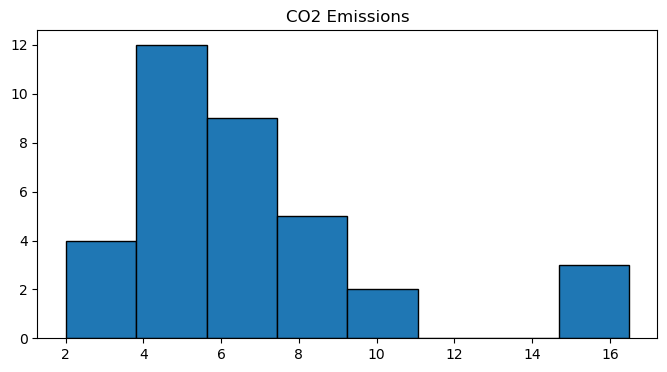

In [17]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west['CO2'], bins=8, edgecolor='black')
plt.title('CO2 Emissions')
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [18]:
mean_emissions = np.mean(carbon_west['CO2'])
median_emissions = np.median(carbon_west['CO2'])
std_dev_emissions = np.std(carbon_west['CO2'])

print(f'mean: {mean_emissions}')
print(f'median: {median_emissions}')
print(f'standard deviation: {std_dev_emissions}')


mean: 6.717142857142858
median: 5.9
standard deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [19]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders_excluding_dc = murders.iloc[:-1] # since DC is the final row

Part a. Find the mean and standard deviation for murders without D.C.

In [20]:
murders_excluding_dc_mean = np.mean(murders_excluding_dc['murder'])
murders_excluding_dc_std_dev = np.std(murders_excluding_dc['murder'])

print(f'mean: {murders_excluding_dc_mean}')
print(f'standard deviation: {murders_excluding_dc_std_dev}')

mean: 4.874
standard deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [21]:
murders_excluding_dc_min = np.min(murders_excluding_dc['murder'])
murders_excluding_dc_q1 = np.percentile(murders_excluding_dc['murder'], 25)
murders_excluding_dc_median = np.median(murders_excluding_dc['murder'])
murders_excluding_dc_q3 = np.percentile(murders_excluding_dc['murder'], 75)
murders_excluding_dc_max = np.max(murders_excluding_dc['murder'])

print(f'minimum: {murders_excluding_dc_min}')
print(f'first quartile: {murders_excluding_dc_q1}')
print(f'median: {murders_excluding_dc_median}')
print(f'third quartile: {murders_excluding_dc_q3}')
print(f'max: {murders_excluding_dc_max}')

minimum: 1.0
first quartile: 2.625
median: 4.85
third quartile: 6.175
max: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [22]:
murders_mean = np.mean(murders['murder'])
murders_min = np.min(murders['murder'])
murders_q1 = np.percentile(murders['murder'], 25)
murders_median = np.median(murders['murder'])
murders_q3 = np.percentile(murders['murder'], 75)
murders_max = np.max(murders['murder'])

print(f'mean: {murders_min}')
print(f'minimum: {murders_min}')
print(f'first quartile: {murders_q1}')
print(f'median: {murders_median}')
print(f'third quartile: {murders_q3}')
print(f'max: {murders_max}')

# including DC affected the mean more than the median
# including DC affected the range more than the inter-quartile range

mean: 1.0
minimum: 1.0
first quartile: 2.6500000000000004
median: 5.0
third quartile: 6.45
max: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [23]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home. 

Text(0, 0.5, 'Price (Thousands of USD)')

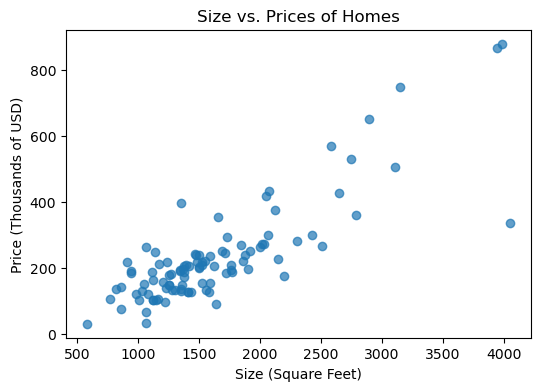

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Size vs. Prices of Homes')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Price (Thousands of USD)')

Part b. Find the correlation between the two variables.

In [25]:
houses_correlation = houses['size'].corr(houses['price'])
print(f'correlation: {houses_correlation}')

correlation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot. 

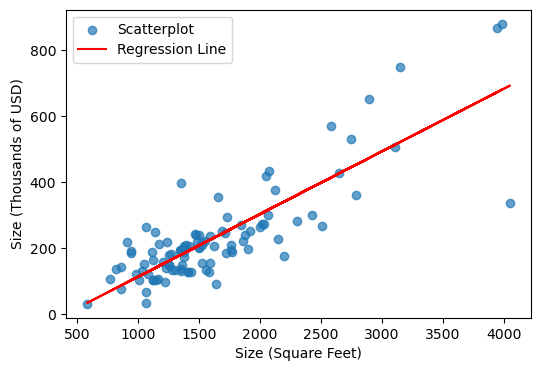

In [26]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Size (Thousands of USD)')
plt.legend()
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

Text(0, 0.5, 'Newness of Home (1=new, 0=old)')

<Figure size 800x600 with 0 Axes>

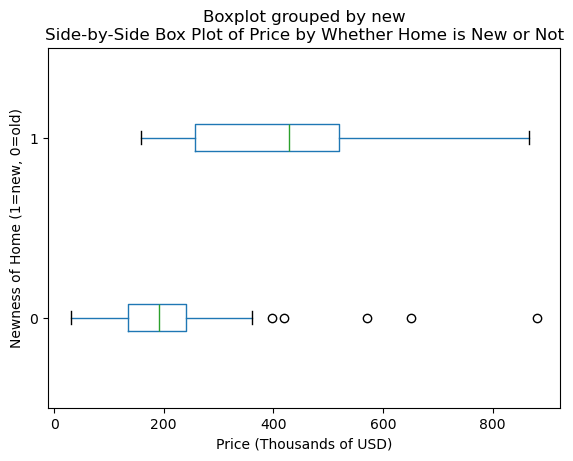

In [27]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.title('Side-by-Side Box Plot of Price by Whether Home is New or Not')
plt.xlabel('Price (Thousands of USD)')
plt.ylabel('Newness of Home (1=new, 0=old)')

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The relationship between size and price is that as size increases, price also increases. This can be seen from the scatterplot and regression line, with size on the x-axis and price on the y-axis. The correlation between these two variables is about 0.834. Since it is a positive value, it is evidence that as size increases, price also increases.

The relationship between price and whether or not a house is new is that in general, the price of new houses is greater than the price of old houses. There are five outliers in the set of old houses, but the overall trend remains for the bulk of the data. The minimum price of an old house is slightly lower than the minimum price of a new house, and the maximum price of an old house is significnatly less than the maximum price of a new house. The median is also less. The inter-quartile ranges of the two seem to not overlap or barely overlap, which is further evidence that newer houses are generally more expensive.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [28]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [29]:
pd.crosstab(happy['marital'], happy['happiness'])
# pd.crosstab(happy['marital'], happy['happiness'], normalize='index')

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
